In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
string_seq_df = pd.read_csv("../datasets/train/train_text_seq.csv")
string_seq_df

# count the number of leading zeroes
# sum the digits
# find the distributions of digits 

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1
...,...,...
7075,0000026267027181596614464154364222842626141596...,1
7076,0000464422155826261433491543615961596284614390...,1
7077,0003069915964309154366142624644222841795262614...,1
7078,0000614159615436198346426242237758262159694061...,0


In [16]:
emote_df = pd.read_csv("../datasets/train/train_emoticon.csv")
emote_df

# 1. split the string into individual characters
# 2. run a correlation matrix on each category
# check number of distinct emotes

# Split the string into individual characters
emote_df['characters'] = emote_df['input_emoticon'].apply(list)

# Create new columns for each character
for i in range(len(emote_df['characters'][0])):
    emote_df[f'c_{i+1}'] = emote_df['characters'].apply(lambda x: x[i] if len(x) > i else '')
l1 = [f'c_{i+1}' for i in range(len(emote_df['characters'][0]))]
edf = emote_df[l1].apply(lambda x: [ord(i) for i in x])
edf.insert(13, 'label', emote_df['label'])
emote_df[['input_emoticon', 'label']].head(25)

,input_emoticon,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1
5,😑😣🚧😛🚜🚼🙯🛐🙼😣😑🙕🙯,1
6,😣😑🙯🚼🛐🚥😬😛😣🚄😑🙼🙯,0
7,🚡🚼😑🛐🚔🙯😛😣😑🙯🛓🙼😣,0
8,🛐😛🛜😑🚼😚😣🙯😣😑🙯🚠🙼,0
9,🙯😑🙷🛐🚼😣😛😍😿🙯🙼😑😣,1


In [17]:
for i in range(1, 14):
    print(edf[f'c_{i}'].unique().size)

edf

213
213
213
213
213
213
213
213
91
91
91
91
91


,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,label
0,128539,128720,128571,128529,128547,128608,128623,128700,128530,128636,128529,128623,128547,0
1,128720,128529,128554,128539,128700,128623,128547,128645,128529,128623,128569,128547,128636,0
2,128539,128623,128529,128673,128547,128700,128720,128626,128547,128623,128721,128529,128636,0
3,128539,128700,128720,128592,128547,128623,128529,128618,128529,128636,128710,128547,128623,1
4,128720,128671,128700,128539,128587,128529,128547,128623,128569,128623,128529,128547,128636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,128623,128570,128571,128529,128547,128720,128539,128700,128636,128623,128547,128529,128672,1
7076,128720,128700,128517,128623,128547,128633,128539,128529,128529,128636,128547,128653,128623,1
7077,128732,128529,128594,128539,128547,128623,128720,128700,128636,128620,128623,128547,128529,1
7078,128547,128529,128539,128715,128720,128623,128700,128682,128623,128529,128704,128547,128636,0


In [18]:
# using sklearn, create a basic decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into features and target variable
X = edf.drop('label', axis=1)
y = edf['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5536723163841808


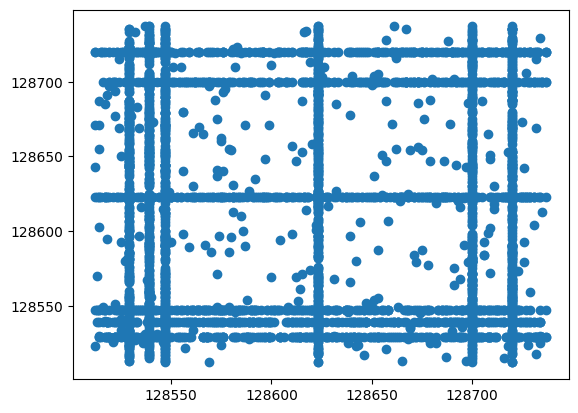

In [19]:
plt.scatter(edf['c_1'], edf['c_2'])

1. this could be sequential


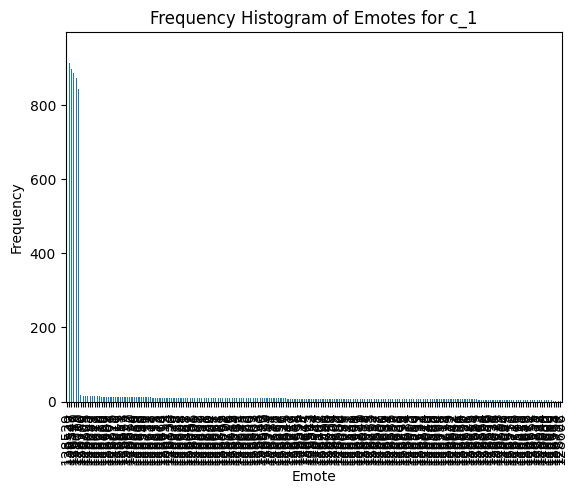

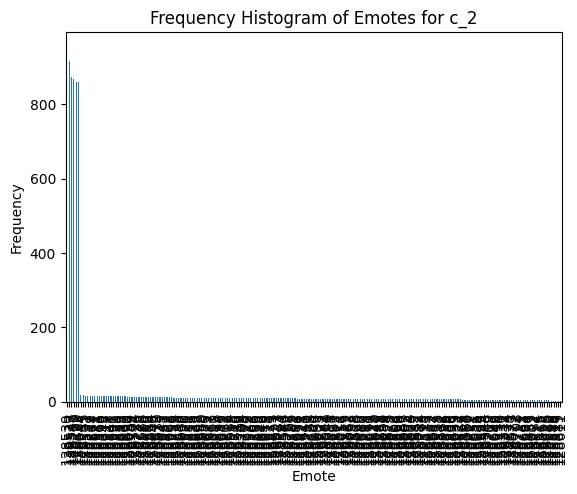

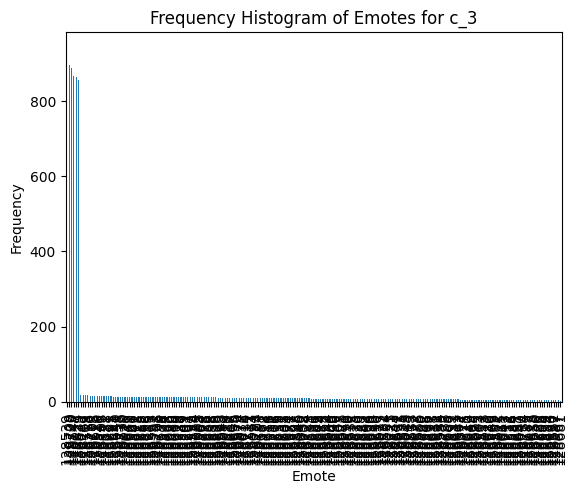

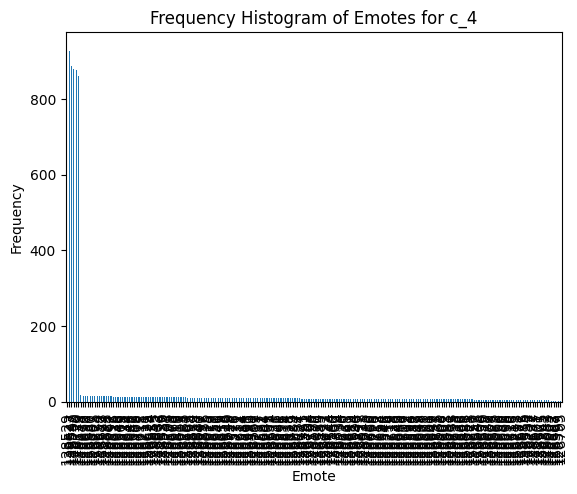

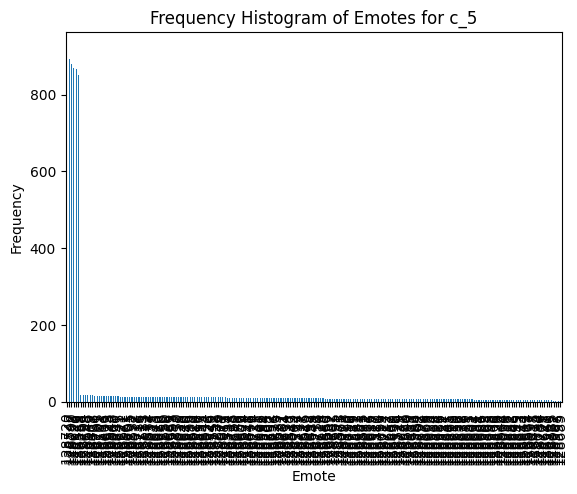

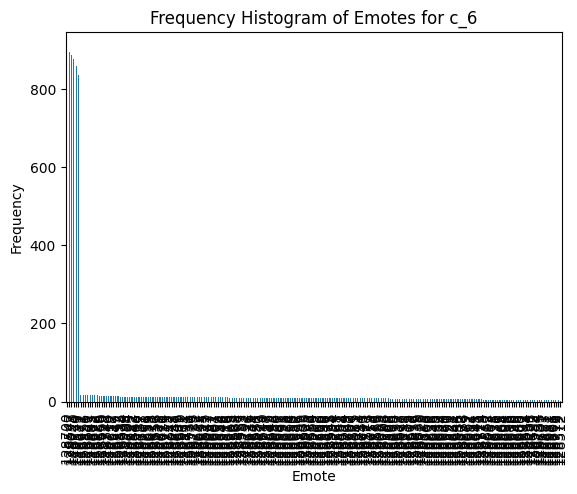

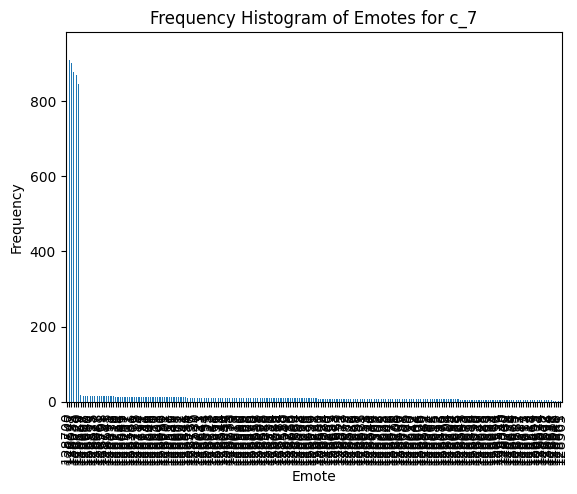

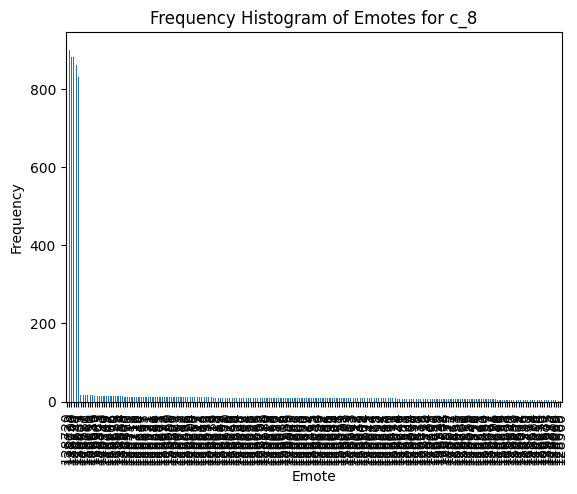

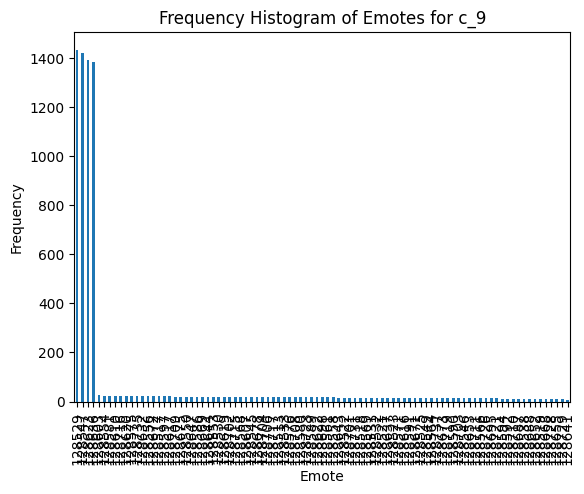

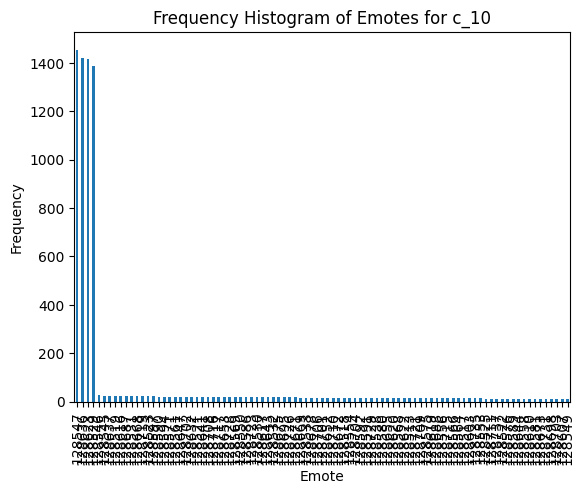

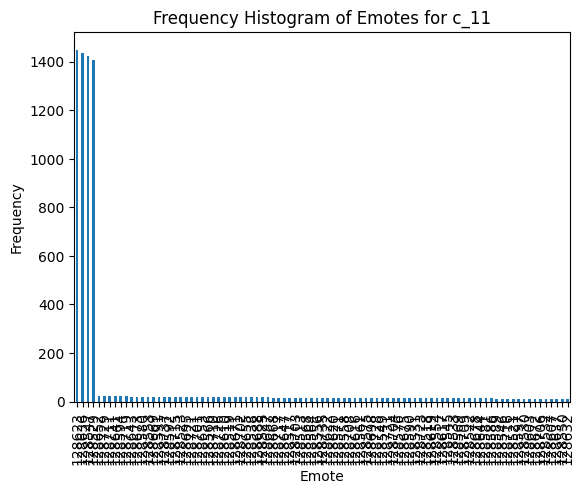

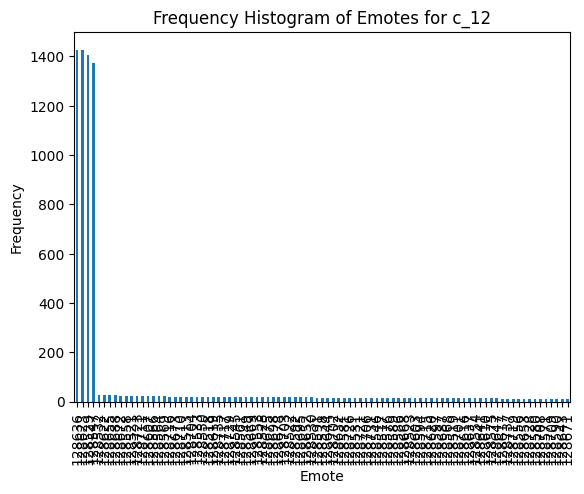

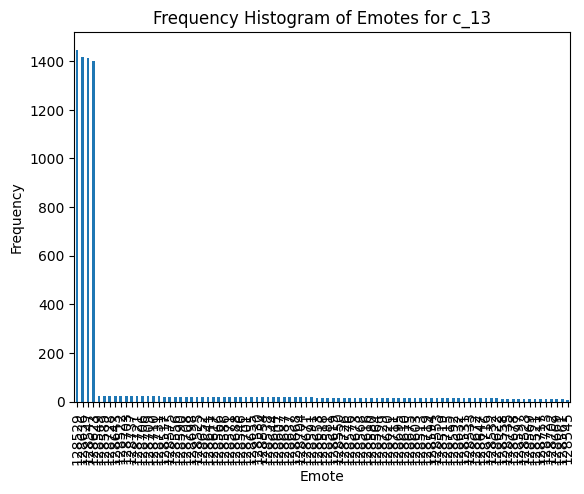

In [20]:
# create a frequency histogram of the emotes for each character
import matplotlib.pyplot as plt

# Create a frequency histogram of the emotes for each character
for col in edf.columns:
    if col.startswith('c_'):
        plt.figure()
        edf[col].value_counts().plot(kind='bar')
        plt.xlabel('Emote')
        plt.ylabel('Frequency')
        plt.title(f'Frequency Histogram of Emotes for {col}')
        plt.show()